In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore') 

In [68]:
df=pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [69]:
df.shape

(2966, 8)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [71]:
df_categorical = df.select_dtypes(include='object')  
df_numerical = df.select_dtypes(exclude='object')

In [72]:
df_categorical

,Gender,Stream
0,Male,Electronics And Communication
1,Female,Computer Science
2,Female,Information Technology
3,Male,Information Technology
4,Male,Mechanical
...,...,...
2961,Male,Information Technology
2962,Male,Mechanical
2963,Male,Information Technology
2964,Male,Computer Science


(-1.2055451509733275,
 1.2039377314483057,
 -1.2164105994786039,
 1.1899975724817595)

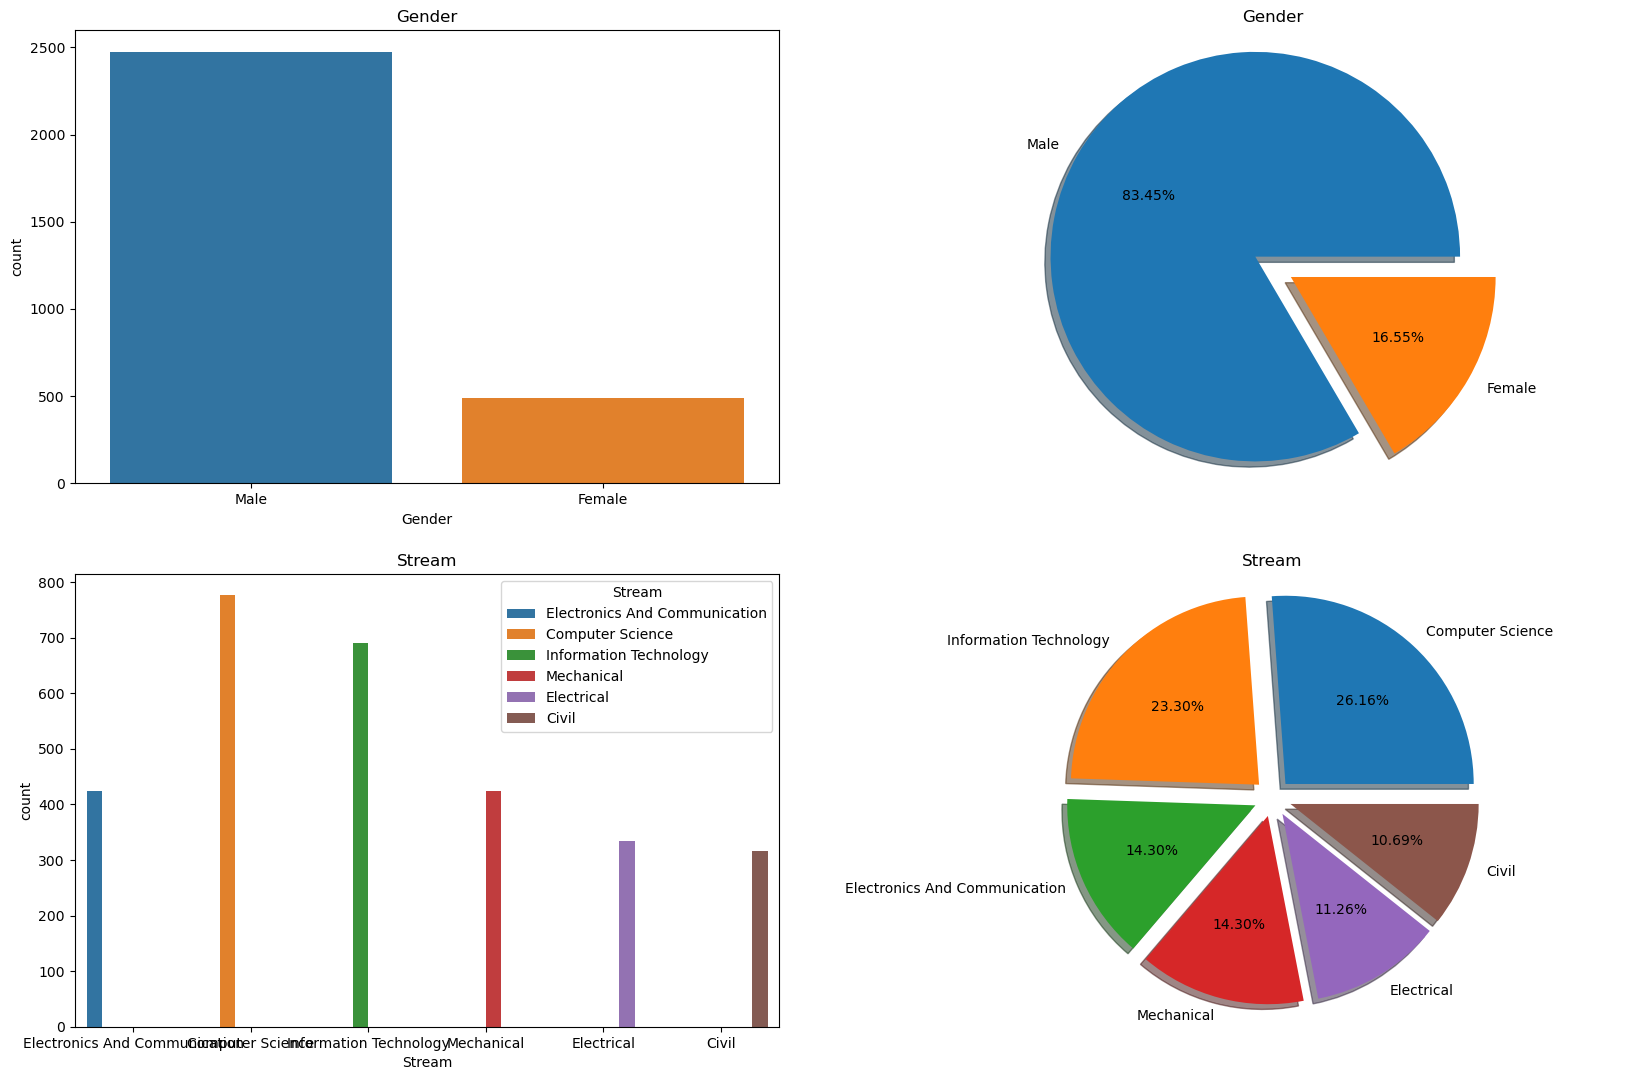

In [75]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.countplot(df.Gender)
plt.title('Gender') 
plt.subplot(3,2,2)
Gender = df.Gender.value_counts()
plt.pie(Gender,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Gender.index)
plt.title('Gender')
plt.axis('equal')

plt.subplot(3,2,3)
sns.countplot(df.Stream,hue=df.Stream)
plt.title('Stream') 
plt.subplot(3,2,4)
Stream = df.Stream.value_counts()
plt.pie(Stream,explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Stream.index)
plt.title('Stream')
plt.axis('equal')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

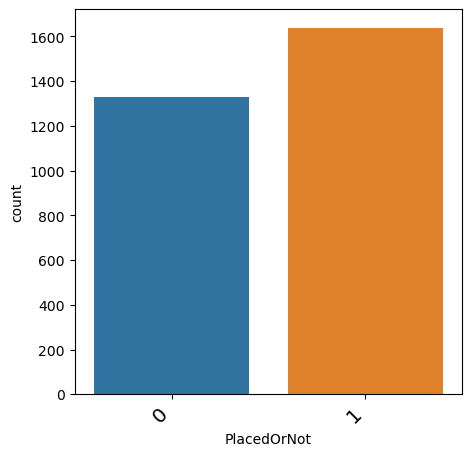

In [78]:
#Distribution of Target Variable
plt.figure(figsize=(5,5))
dia = sns.countplot(df['PlacedOrNot'],data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

In [79]:
df_numerical.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


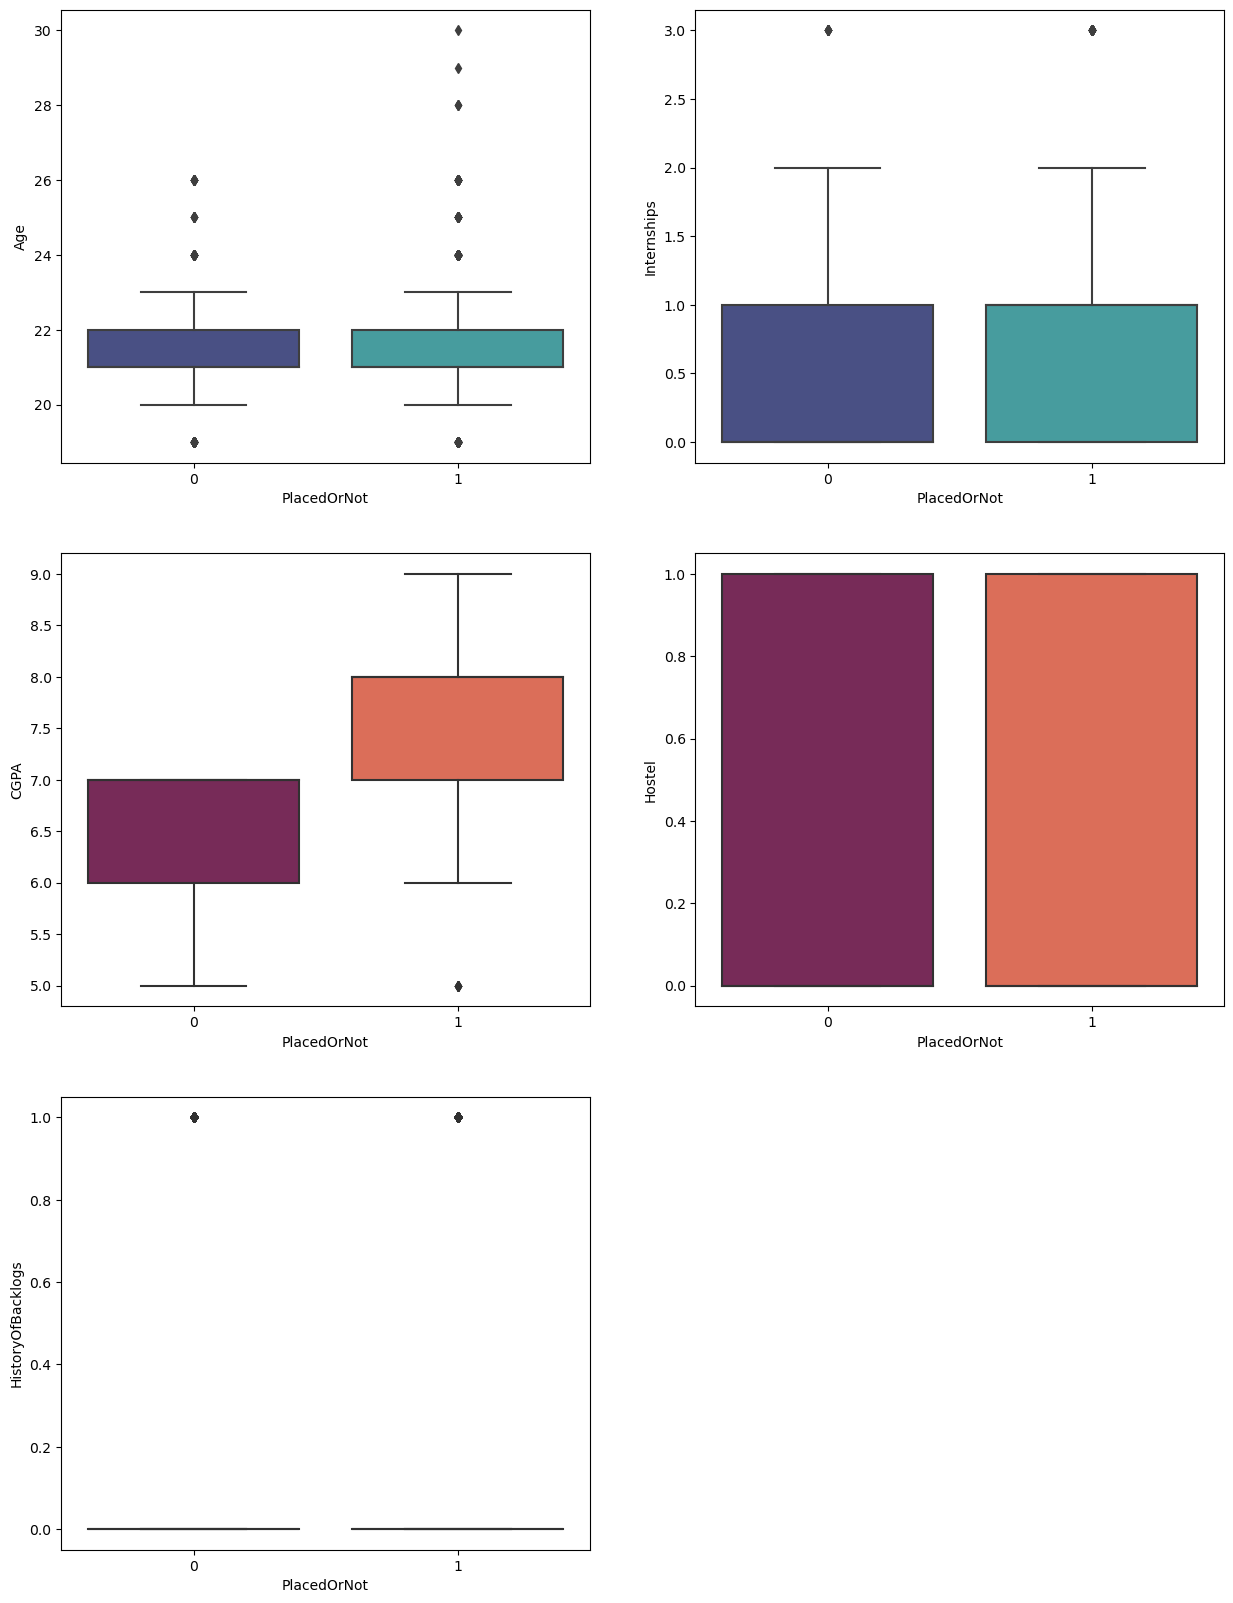

In [107]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(x="PlacedOrNot", y="Age", data=df, palette="mako");


plt.subplot(3,2,2)
sns.boxplot(x="PlacedOrNot", y="Internships", data=df, palette="mako");

plt.subplot(3,2,3)
sns.boxplot(x="PlacedOrNot", y="CGPA", data=df, palette="rocket");

plt.subplot(3,2,4)
sns.boxplot(x="PlacedOrNot", y="Hostel", data=df, palette="rocket");

plt.subplot(3,2,5)
sns.boxplot(x="PlacedOrNot", y="HistoryOfBacklogs", data=df, palette="rocket");


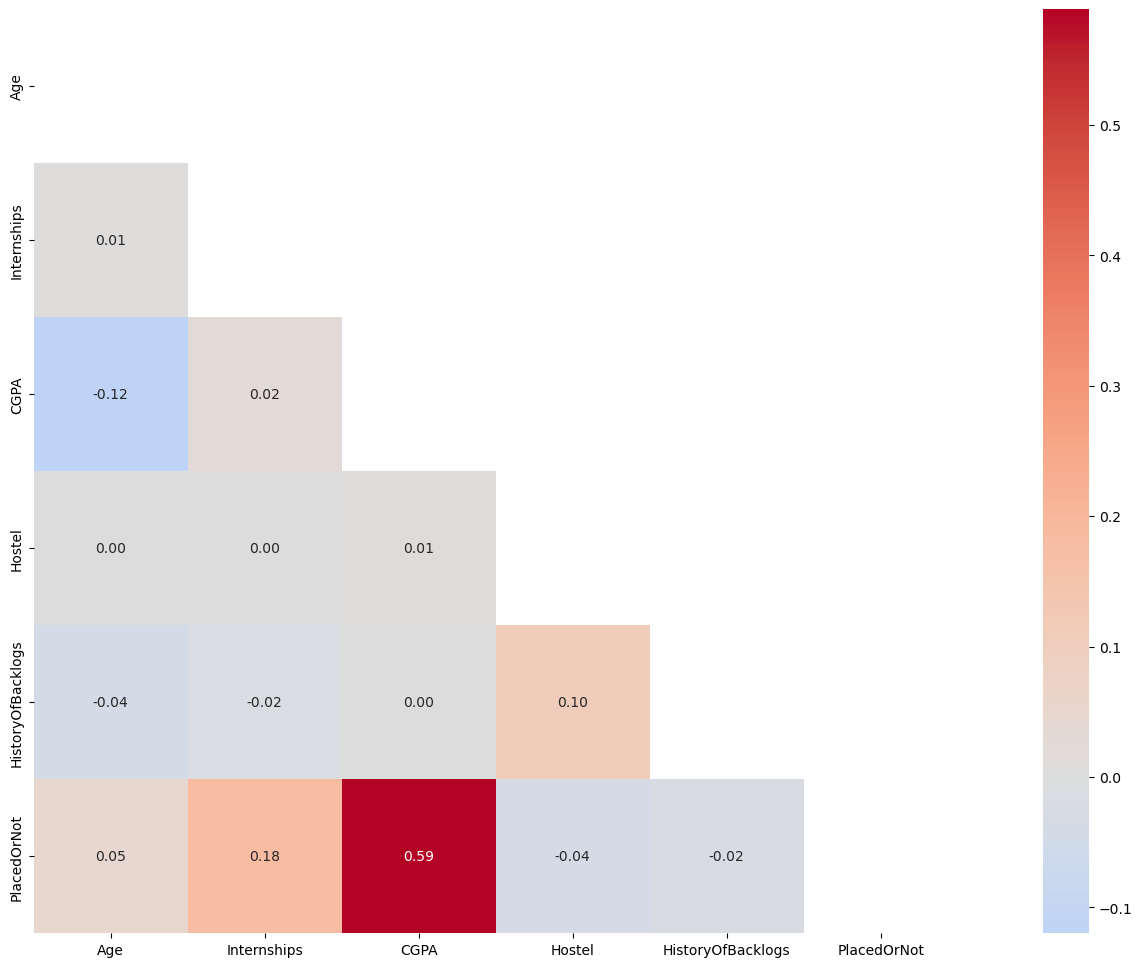

In [80]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [81]:
for column in df_categorical:
    print(f'{column}: {df_categorical[column].unique()}')

Gender: ['Male' 'Female']
Stream: ['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil']


In [82]:
df['Stream'] = df['Stream'].replace({'Electronics And Communication':'Electronics_And_Communication','Computer Science':'Computer_Science','Information Technology':'Information_Technology'})

In [83]:
df_categorical = df.select_dtypes(include='object') 
for column in df_categorical:
    print(f'{column}: {df_categorical[column].unique()}')

Gender: ['Male' 'Female']
Stream: ['Electronics_And_Communication' 'Computer_Science'
 'Information_Technology' 'Mechanical' 'Electrical' 'Civil']


In [84]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [85]:
# Map text to 1/0 
df[['Gender']] = df[['Gender']].replace(to_replace={'Male':1,'Female':0})

In [86]:
df = pd.get_dummies(data=df, columns=['Stream'],drop_first=True)
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer_Science,Stream_Electrical,Stream_Electronics_And_Communication,Stream_Information_Technology,Stream_Mechanical
0,22,1,1,8,1,1,1,0,0,1,0,0
1,21,0,0,7,1,1,1,1,0,0,0,0
2,22,0,1,6,0,0,1,0,0,0,1,0
3,21,1,0,8,0,1,1,0,0,0,1,0
4,22,1,0,8,1,0,1,0,0,0,0,1


In [87]:
X = df.drop('PlacedOrNot',axis=1)
y = df['PlacedOrNot']

In [88]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [89]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

ModelLR = LogisticRegression()
ModelRF = RandomForestClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelLGB = lgb.LGBMClassifier()
ModelXGB = XGBClassifier()
ModelADA = AdaBoostClassifier()
ModelCatBoost = CatBoostClassifier()

In [93]:
MM = [ModelLR, ModelRF,ModelKNN,ModelLGB,ModelXGB,ModelADA,ModelCatBoost]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    models.fit(X_train, y_train)
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)

     
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    
    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)
    
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    


Learning rate set to 0.014493
0:	learn: 0.6728181	total: 166ms	remaining: 2m 45s
1:	learn: 0.6536817	total: 171ms	remaining: 1m 25s
2:	learn: 0.6371213	total: 177ms	remaining: 58.8s
3:	learn: 0.6198074	total: 180ms	remaining: 44.8s
4:	learn: 0.6043393	total: 182ms	remaining: 36.3s
5:	learn: 0.5895654	total: 184ms	remaining: 30.5s
6:	learn: 0.5762767	total: 187ms	remaining: 26.5s
7:	learn: 0.5633808	total: 189ms	remaining: 23.5s
8:	learn: 0.5519644	total: 192ms	remaining: 21.1s
9:	learn: 0.5396388	total: 194ms	remaining: 19.2s
10:	learn: 0.5281281	total: 196ms	remaining: 17.7s
11:	learn: 0.5172221	total: 199ms	remaining: 16.4s
12:	learn: 0.5071536	total: 201ms	remaining: 15.3s
13:	learn: 0.4986095	total: 204ms	remaining: 14.4s
14:	learn: 0.4898325	total: 207ms	remaining: 13.6s
15:	learn: 0.4799865	total: 210ms	remaining: 12.9s
16:	learn: 0.4709038	total: 213ms	remaining: 12.3s
17:	learn: 0.4637833	total: 215ms	remaining: 11.8s
18:	learn: 0.4569628	total: 218ms	remaining: 11.3s
19:	learn

161:	learn: 0.2737338	total: 583ms	remaining: 3.02s
162:	learn: 0.2735600	total: 586ms	remaining: 3.01s
163:	learn: 0.2734816	total: 588ms	remaining: 3s
164:	learn: 0.2731388	total: 591ms	remaining: 2.99s
165:	learn: 0.2729876	total: 594ms	remaining: 2.98s
166:	learn: 0.2726777	total: 596ms	remaining: 2.97s
167:	learn: 0.2724898	total: 599ms	remaining: 2.97s
168:	learn: 0.2721673	total: 602ms	remaining: 2.96s
169:	learn: 0.2719803	total: 605ms	remaining: 2.95s
170:	learn: 0.2715911	total: 608ms	remaining: 2.95s
171:	learn: 0.2713944	total: 611ms	remaining: 2.94s
172:	learn: 0.2711365	total: 614ms	remaining: 2.94s
173:	learn: 0.2708998	total: 617ms	remaining: 2.93s
174:	learn: 0.2705390	total: 619ms	remaining: 2.92s
175:	learn: 0.2701812	total: 622ms	remaining: 2.91s
176:	learn: 0.2697827	total: 625ms	remaining: 2.91s
177:	learn: 0.2695156	total: 628ms	remaining: 2.9s
178:	learn: 0.2691024	total: 631ms	remaining: 2.89s
179:	learn: 0.2688812	total: 634ms	remaining: 2.89s
180:	learn: 0.26

386:	learn: 0.2401281	total: 1.17s	remaining: 1.84s
387:	learn: 0.2400282	total: 1.17s	remaining: 1.84s
388:	learn: 0.2400031	total: 1.17s	remaining: 1.84s
389:	learn: 0.2398688	total: 1.17s	remaining: 1.83s
390:	learn: 0.2398061	total: 1.18s	remaining: 1.83s
391:	learn: 0.2396717	total: 1.18s	remaining: 1.83s
392:	learn: 0.2395610	total: 1.18s	remaining: 1.82s
393:	learn: 0.2395012	total: 1.18s	remaining: 1.82s
394:	learn: 0.2394232	total: 1.19s	remaining: 1.82s
395:	learn: 0.2392551	total: 1.19s	remaining: 1.81s
396:	learn: 0.2392500	total: 1.19s	remaining: 1.81s
397:	learn: 0.2391755	total: 1.2s	remaining: 1.81s
398:	learn: 0.2390617	total: 1.2s	remaining: 1.8s
399:	learn: 0.2389453	total: 1.2s	remaining: 1.8s
400:	learn: 0.2388916	total: 1.2s	remaining: 1.8s
401:	learn: 0.2388436	total: 1.2s	remaining: 1.79s
402:	learn: 0.2388148	total: 1.21s	remaining: 1.79s
403:	learn: 0.2387375	total: 1.21s	remaining: 1.78s
404:	learn: 0.2386511	total: 1.21s	remaining: 1.78s
405:	learn: 0.238546

603:	learn: 0.2230709	total: 1.75s	remaining: 1.14s
604:	learn: 0.2230021	total: 1.75s	remaining: 1.14s
605:	learn: 0.2228763	total: 1.75s	remaining: 1.14s
606:	learn: 0.2227919	total: 1.75s	remaining: 1.14s
607:	learn: 0.2227250	total: 1.76s	remaining: 1.13s
608:	learn: 0.2226317	total: 1.76s	remaining: 1.13s
609:	learn: 0.2225728	total: 1.76s	remaining: 1.13s
610:	learn: 0.2224798	total: 1.76s	remaining: 1.12s
611:	learn: 0.2223901	total: 1.77s	remaining: 1.12s
612:	learn: 0.2223321	total: 1.77s	remaining: 1.12s
613:	learn: 0.2222326	total: 1.77s	remaining: 1.11s
614:	learn: 0.2220796	total: 1.78s	remaining: 1.11s
615:	learn: 0.2219989	total: 1.78s	remaining: 1.11s
616:	learn: 0.2219273	total: 1.78s	remaining: 1.11s
617:	learn: 0.2218682	total: 1.78s	remaining: 1.1s
618:	learn: 0.2218042	total: 1.79s	remaining: 1.1s
619:	learn: 0.2218016	total: 1.79s	remaining: 1.1s
620:	learn: 0.2216474	total: 1.79s	remaining: 1.09s
621:	learn: 0.2215818	total: 1.8s	remaining: 1.09s
622:	learn: 0.22

820:	learn: 0.2083315	total: 2.34s	remaining: 510ms
821:	learn: 0.2082974	total: 2.34s	remaining: 507ms
822:	learn: 0.2082279	total: 2.34s	remaining: 504ms
823:	learn: 0.2081843	total: 2.35s	remaining: 501ms
824:	learn: 0.2081644	total: 2.35s	remaining: 498ms
825:	learn: 0.2081063	total: 2.35s	remaining: 495ms
826:	learn: 0.2080800	total: 2.35s	remaining: 492ms
827:	learn: 0.2080212	total: 2.36s	remaining: 490ms
828:	learn: 0.2079642	total: 2.36s	remaining: 487ms
829:	learn: 0.2078968	total: 2.36s	remaining: 484ms
830:	learn: 0.2078639	total: 2.36s	remaining: 481ms
831:	learn: 0.2077845	total: 2.37s	remaining: 478ms
832:	learn: 0.2077332	total: 2.37s	remaining: 475ms
833:	learn: 0.2076995	total: 2.37s	remaining: 472ms
834:	learn: 0.2076611	total: 2.38s	remaining: 469ms
835:	learn: 0.2076001	total: 2.38s	remaining: 467ms
836:	learn: 0.2075463	total: 2.38s	remaining: 464ms
837:	learn: 0.2074665	total: 2.39s	remaining: 461ms
838:	learn: 0.2074080	total: 2.39s	remaining: 458ms
839:	learn: 

In [95]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNeighbors Classifier','LGBM Classifier','XGBClassifier','ADABoost','CatBoostClassifier'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1],score_train_list[2] ,score_train_list[3] ,score_train_list[4],score_train_list[5],score_train_list[6]  
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2] , score_test_list[3] , score_test_list[4] , score_test_list[5], score_test_list[6]  
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5], recall_list[6]
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5],precision_list[6]
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5],f1Score_list[6] 
                   ],

})


In [96]:
models.sort_values(by=['Recall', 'Score_test'], ascending=False) 

,Model,Score_train,Score_test,Recall,Precision,F1 Score
6,CatBoostClassifier,0.916367,0.890836,0.845,0.947,0.893
4,XGBClassifier,0.918615,0.878706,0.842,0.926,0.882
1,Random Forest Classifier,0.924910,0.874663,0.842,0.918,0.879
3,LGBM Classifier,0.911421,0.878706,0.835,0.933,0.881
5,ADABoost,0.870953,0.873315,0.828,0.930,0.876
2,KNeighbors Classifier,0.878147,0.820755,0.805,0.854,0.829
0,Logistic Regression,0.767536,0.760108,0.800,0.766,0.782


In [102]:
### Create a Pickle file using serialization, Catboost model is used.
import pickle
pickle_out = open("ModelCatBoost.pkl","wb")
pickle.dump(ModelCatBoost, pickle_out)
pickle_out.close()

In [103]:
### Create a Pickle file using serialization for Standard scaler object.
pickle_out = open("sc.pkl","wb")
pickle.dump(sc, pickle_out)
pickle_out.close()